In [1]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report ,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import re
from google.colab import drive


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


drive.mount('/content/drive/')



Mounted at /content/drive/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [3]:
df = pd.read_csv('/content/OnlineNewsPopularity.csv')



In [4]:
df.info() #Provides us the information of every attributes.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  int64  
 2    n_tokens_title                 39644 non-null  int64  
 3    n_tokens_content               39644 non-null  int64  
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  int64  
 8    num_self_hrefs                 39644 non-null  int64  
 9    num_imgs                       39644 non-null  int64  
 10   num_videos                     39644 non-null  int64  
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [5]:
print(df.shape) #Tells us about the shape of the dataset. 

(39644, 61)


In [6]:
df.mean() #To know the mean values of each attribute

 timedelta                           354.530471
 n_tokens_title                       10.398749
 n_tokens_content                    546.514731
 n_unique_tokens                       0.548216
 n_non_stop_words                      0.996469
 n_non_stop_unique_tokens              0.689175
 num_hrefs                            10.883690
 num_self_hrefs                        3.293638
 num_imgs                              4.544143
 num_videos                            1.249874
 average_token_length                  4.548239
 num_keywords                          7.223767
 data_channel_is_lifestyle             0.052946
 data_channel_is_entertainment         0.178009
 data_channel_is_bus                   0.157855
 data_channel_is_socmed                0.058597
 data_channel_is_tech                  0.185299
 data_channel_is_world                 0.212567
 kw_min_min                           26.106801
 kw_max_min                         1153.951682
 kw_avg_min                          312

In [7]:
df.isnull().sum() #We are checking if there is any null value in any attribute or not.



url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
Share                            0
Length: 61, dtype: int64

In [8]:
	df.fillna(df.median())

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Share
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,1,0,0,0,0,0,0.0,0.000,0,0,0.0000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0,1,0,0,0,0,0.0,0.000,0,0,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0,1,0,0,0,0,0.0,0.000,0,0,0.0000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,0
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,0,1,0,0,0,0,0,0.0,0.000,0,0,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,0,0,0,0,1,0,0,0.0,0.000,0,0,0.0000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8,11,346,0.529052,1.0,0.684783,9,7,1,1,4.523121,8,0,0,0,0,1,0,-1,671.0,173.125,26900,843300,374962.5000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333330,0,0,1,0,0,0,0,0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,0
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8,12,328,0.696296,1.0,0.885057,9,7,3,48,4.405488,7,0,0,0,1,0,0,-1,616.0,184.000,6500,843300,192985.7143,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0,0,1,0,0,0,0,0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.00

In [9]:
df.min() #To know the min value

url                              http://mashable.com/2013/01/07/amazon-instant-...
 timedelta                                                                       8
 n_tokens_title                                                                  2
 n_tokens_content                                                                0
 n_unique_tokens                                                                 0
                                                       ...                        
 title_subjectivity                                                              0
 title_sentiment_polarity                                                       -1
 abs_title_subjectivity                                                          0
 abs_title_sentiment_polarity                                                    0
Share                                                                            0
Length: 61, dtype: object

In [10]:
df.isin(['	?']).sum() #data which includes the '?' sign as some data sets contain erroneous values.

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
Share                            0
Length: 61, dtype: int64

In [11]:
clm=df.columns   #To know the columns names for our convenience.
clm       

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [14]:
from sklearn.model_selection import train_test_split



y = df['Share']      #We are mentioning that the value 'Y' contains the last attribute 'SHARE'

X=df.drop(columns=['Share', 'url'])         #Hence, we are dropping the share and url value from X. 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f372a48b3d0>,
      dtype=object)

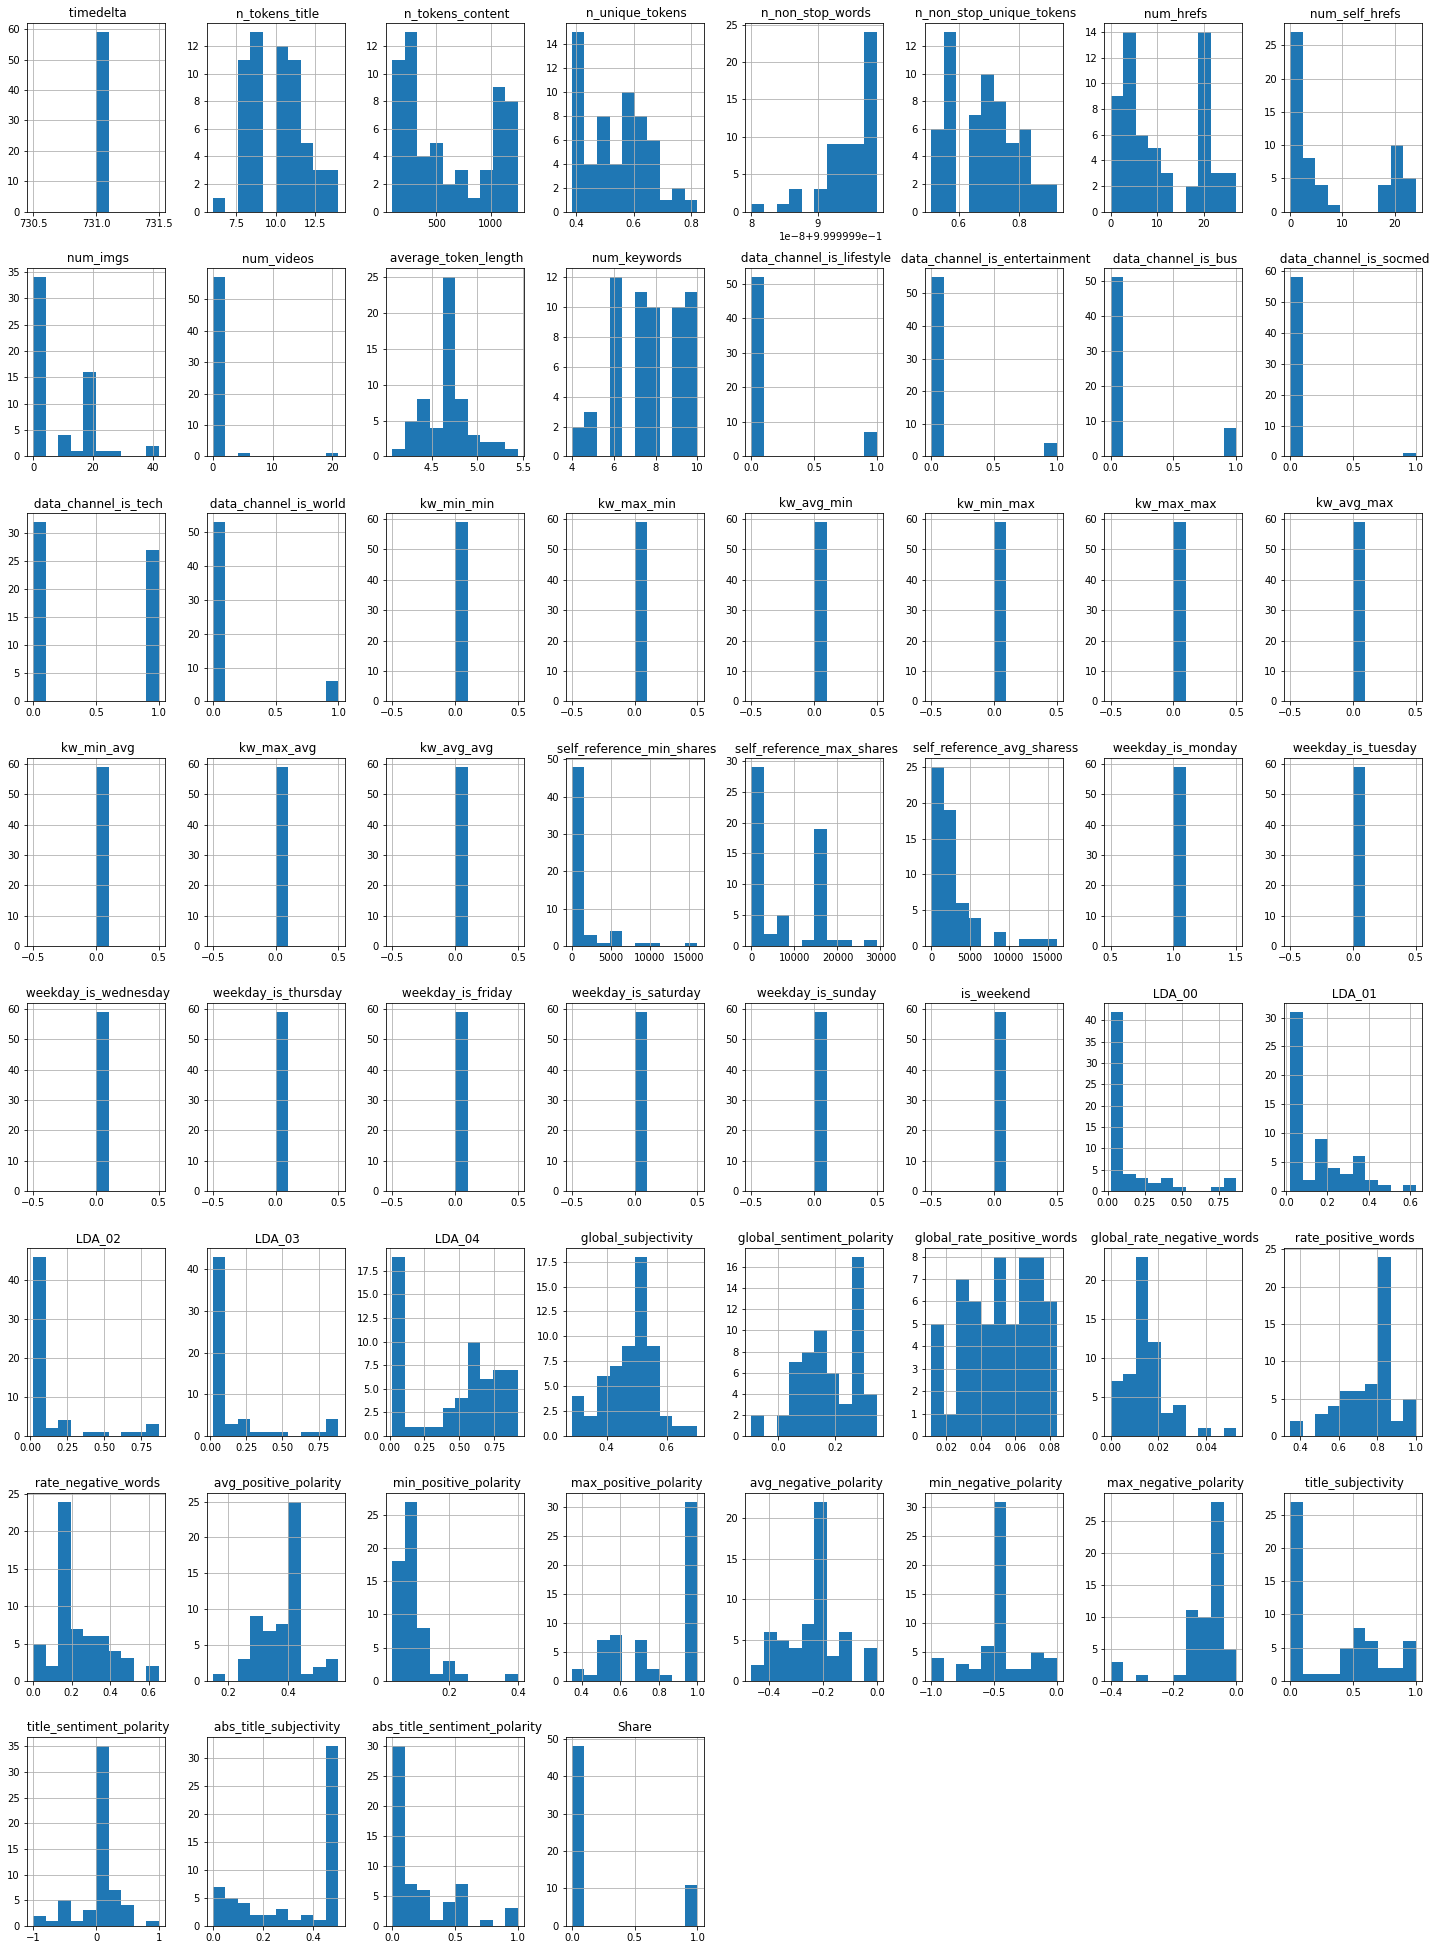

In [15]:
df.iloc[1:60].hist(xlabelsize=10,ylabelsize=10,figsize=(25,35)) #Shows the Histograms. Histogram is a kind of graph that we use for data analysis.

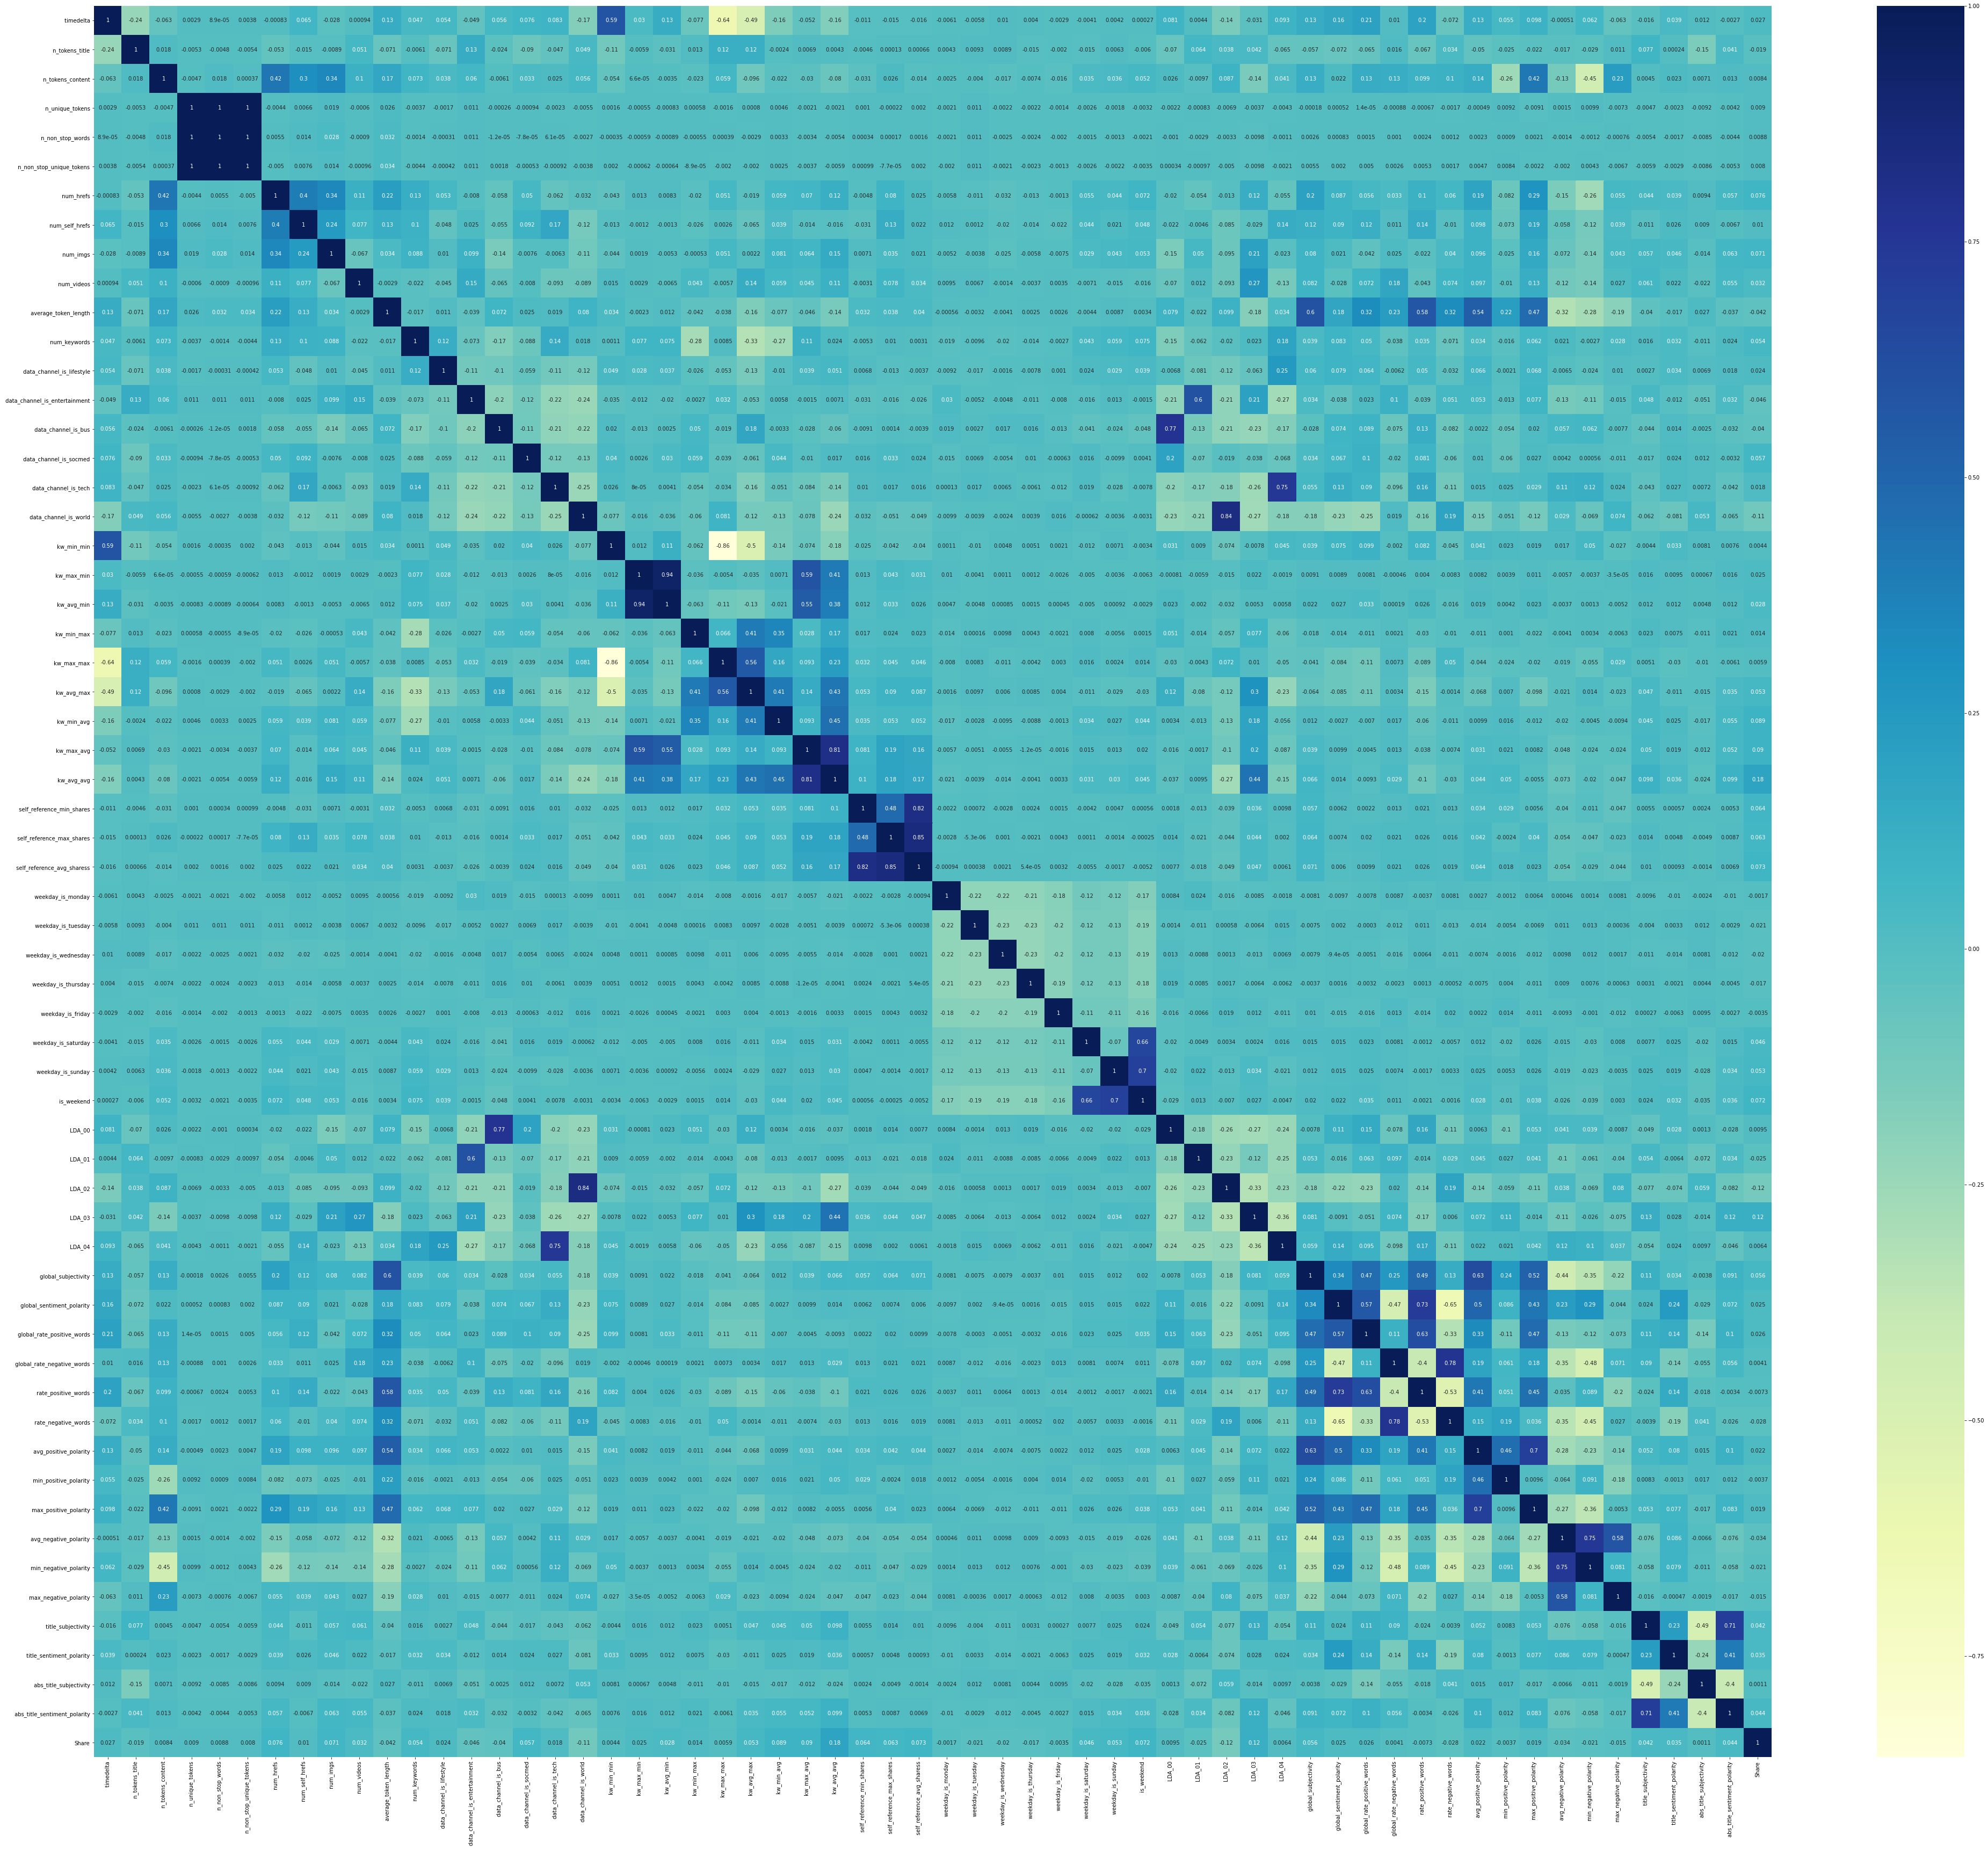

In [16]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize = (70,60))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.show()  #showing the correlation heatmap

In [20]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
scaler= MinMaxScaler()
scaler.fit(X)
X_train= scaler.transform(X_train)
X_scaled =scaler.transform(X)
print("scaled value")
print(X_scaled)  #Scaling all the features between 0 and 1 for running all the algorithms. 


scaled value
[[1.         0.47619048 0.02584376 ... 0.40625    0.         0.1875    ]
 [1.         0.33333333 0.03009205 ... 0.5        1.         0.        ]
 [1.         0.33333333 0.02489969 ... 0.5        1.         0.        ]
 ...
 [0.         0.38095238 0.05215955 ... 0.56818182 0.09090909 0.13636364]
 [0.         0.19047619 0.08048147 ... 0.5        1.         0.        ]
 [0.         0.38095238 0.01852726 ... 0.625      0.33333333 0.25      ]]


In [21]:
def _assert_all_finite(X):
    """Like assert_all_finite, but only for ndarray."""
    X = np.asanyarray(X)
    # First try an O(n) time, O(1) space solution for the common case that
    # everything is finite; fall back to O(n) space np.isfinite to prevent
    # false positives from overflow in sum method.
    if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
            and not np.isfinite(X).all()):
        raise ValueError("Input contains NaN, infinity"
                         " or a value too large for %r." % X.dtype)

K-FOLD


In [22]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [23]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]):
    print(train_index, test_index)

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [0 1 2]
[ 0  1  2  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [3 4 5]
[ 0  1  2  3  4  5  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [6 7 8]
[ 0  1  2  3  4  5  6  7  8 12 13 14 15 16 17 18 19 20 21 22 23] [ 9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22 23] [12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 16 17 18 19 20 21 22 23] [14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 20 21 22 23] [16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 20 21 22 23] [18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 22 23] [20 21]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] [22 23]


In [24]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [25]:
from numpy import mean, std
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
folds = StratifiedKFold(n_splits = 10)

def models(X_train, y_train,scoring, cv):

    scoresLR = cross_val_score(LogisticRegression(), X, y, scoring = scoring, cv = cv, n_jobs = 1)
    print(' for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))
    
    scoresRF = cross_val_score(RandomForestClassifier(n_estimators = 40), X, y, scoring = scoring, cv = cv, n_jobs = 1)
    print(' for Random Forest Model: %.3f (%.3f)' % (mean(scoresRF), std(scoresRF)))

    scoresKNN = cross_val_score(KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean'), X, y, scoring = scoring, cv = cv, n_jobs = 1)
    print(' for KNN Model: %.3f (%.3f)' % (mean(scoresKNN), std(scoresKNN)))

    scoresDtree= cross_val_score(DecisionTreeClassifier(max_depth= 10, criterion='gini'), X, y, scoring = scoring, cv = cv, n_jobs = 1)
    print(' for Decision Tree Model: %.3f (%.3f)' % (mean(scoresDtree), std(scoresDtree)))

    scoresSV = cross_val_score(SVC(), X, y, scoring = scoring, cv = cv, n_jobs = 1)
    print(' for SVM Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))

    

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [27]:
cv= StratifiedKFold(n_splits=10, random_state=1, shuffle = True)

print ('\n Accuracy: \n')
models(X_train, y_train, 'accuracy', cv)

print ('\n Precision: \n')
models(X_train, y_train, 'precision', cv)

print ('\n Recall: \n')
models(X_train, y_train, 'recall', cv)

print ('\n F-measure: \n')
models(X_train, y_train, 'f1', cv)

print ('\nROC: \n')
models(X_train, y_train, 'roc_auc', cv)



 Accuracy: 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


 for Logistic Regression Model: 0.776 (0.003)


KeyboardInterrupt: ignored

In [28]:
#Feature_importance

from sklearn.ensemble import ExtraTreesClassifier

In [29]:
model = ExtraTreesClassifier()

In [30]:
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [31]:
model.feature_importances_


array([0.02205522, 0.02249547, 0.02128212, 0.02114592, 0.00060858,
       0.02116946, 0.02267396, 0.019973  , 0.02138262, 0.01848438,
       0.02138426, 0.02028682, 0.00395483, 0.00706037, 0.00465677,
       0.00540217, 0.0045943 , 0.00718518, 0.01326153, 0.02151777,
       0.02137077, 0.01801585, 0.01109068, 0.0222965 , 0.02596718,
       0.02439482, 0.02785827, 0.02496596, 0.0221377 , 0.02385302,
       0.00900563, 0.00875484, 0.00884681, 0.00886806, 0.00851146,
       0.00340147, 0.00362985, 0.0054604 , 0.02202853, 0.02117967,
       0.02590402, 0.02760977, 0.02128452, 0.02137294, 0.019737  ,
       0.01987899, 0.01929315, 0.01895152, 0.01887475, 0.02022834,
       0.0183318 , 0.01811505, 0.01984597, 0.01957009, 0.01875954,
       0.01804847, 0.0172067 , 0.01753021, 0.01724499])

In [32]:
top = pd.Series(model.feature_importances_, index= X.columns)

In [33]:
top

 timedelta                        0.022055
 n_tokens_title                   0.022495
 n_tokens_content                 0.021282
 n_unique_tokens                  0.021146
 n_non_stop_words                 0.000609
 n_non_stop_unique_tokens         0.021169
 num_hrefs                        0.022674
 num_self_hrefs                   0.019973
 num_imgs                         0.021383
 num_videos                       0.018484
 average_token_length             0.021384
 num_keywords                     0.020287
 data_channel_is_lifestyle        0.003955
 data_channel_is_entertainment    0.007060
 data_channel_is_bus              0.004657
 data_channel_is_socmed           0.005402
 data_channel_is_tech             0.004594
 data_channel_is_world            0.007185
 kw_min_min                       0.013262
 kw_max_min                       0.021518
 kw_avg_min                       0.021371
 kw_min_max                       0.018016
 kw_max_max                       0.011091
 kw_avg_max

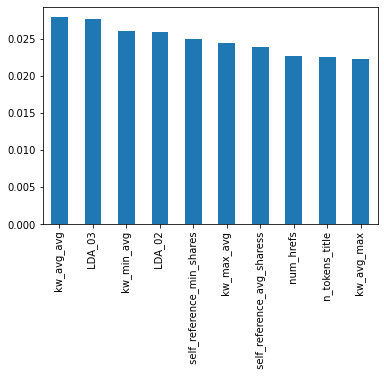

In [34]:
top.nlargest(10).plot(kind='bar')